# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Convallaria-1-CreateNoiseModel' notebook first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
path='data/Convallaria/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

In [3]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'noiseModel.npy')

# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

### Create the Network and Train it
This can take a while.

In [4]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv', directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 100, stepsPerEpoch=5)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 4.673717379570007+-(2SEM)0.07422767626089374      
Epoch 1 finished      
avg. loss: 4.272440791130066+-(2SEM)0.06742670441299566      
Epoch 2 finished      
avg. loss: 3.8786499381065367+-(2SEM)0.061194106824552945      
Epoch 3 finished      
avg. loss: 3.878215456008911+-(2SEM)0.06258685568279643      
Epoch 4 finished      
avg. loss: 3.8617048144340513+-(2SEM)0.05061116008217909      
Epoch 5 finished      
avg. loss: 3.719193422794342+-(2SEM)0.04778794627802483      
Epoch 6 finished      
avg. loss: 3.7254513621330263+-(2SEM)0.05484727410582969      
Epoch 7 finished      
avg. loss: 3.735727643966675+-(2SEM)0.05603405406871043      
Epoch 8 finished      
avg. loss: 3.634932816028595+-(2SEM)0.06616973768046368      
Epoch 9 finished      
avg. loss: 3.5867050886154175+-(2SEM)0.08631560394208097      
Epoch 10 finished      
avg. loss: 3.633726990222931+-(2SEM)0.07612874882695073      
Epoch 11 finished      
avg. loss: 3.589245820045471+-(2SEM

avg. loss: 2.9893126010894777+-(2SEM)0.03777751898798125      
Epoch 94 finished      
avg. loss: 2.9578820705413817+-(2SEM)0.039771109735494685      
Epoch 95 finished      
avg. loss: 2.9842082023620606+-(2SEM)0.048265000148170124      
Epoch    95: reducing learning rate of group 0 to 1.2500e-05.
Epoch 96 finished      
avg. loss: 3.00778489112854+-(2SEM)0.06178807346315834      
Epoch 97 finished      
avg. loss: 3.0171364545822144+-(2SEM)0.05281697251896338      
Epoch 98 finished      
avg. loss: 2.9695716500282288+-(2SEM)0.05347654407160439      
Epoch 99 finished      
avg. loss: 2.9975167512893677+-(2SEM)0.05205631424390405      
Finished Training      


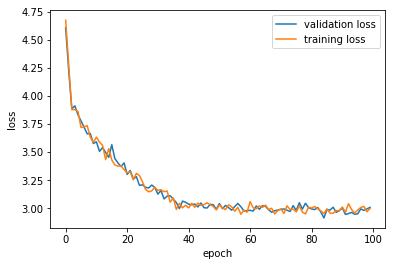

In [5]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()